In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electronics-product-pricing-dataset/electronics_products_pricing.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/electronics-product-pricing-dataset/electronics_products_pricing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,...,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price
0,AVphrugr1cnluZ0-FOeH,Yes,New,USD,"2017-05-10T20:00:00Z,2017-05-09T15:00:00Z",False,Bestbuy.com,NaN,http://www.bestbuy.com/site/products/7100293.p...,B00I9HD8PK,...,https://i5.walmartimages.com/asr/dd5f42c4-076c...,"819127010485,ecoxgearecostonebluetoothspeaker/...",Ecoxgear,GDI-EGST701,EcoXGear Ecostone Bluetooth Speaker,Electronics,http://www.walmart.com/ip/EcoXGear-Ecostone-Bl...,8.19E+11,3 pounds,92.99
1,AVrI6FDbv8e3D1O-lm4R,Yes,New,USD,"2017-10-10T02:00:00Z,2017-08-12T03:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/lenovo-100s-14ibr...,B06ZY63J8H,...,https://i5.walmartimages.com/asr/fcc50cce-a3c1...,"190793918948,lenovo100s14ibr14laptopintelceler...",NaN,100s-14ibr,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,Electronics,https://www.walmart.com/ip/Lenovo-100S-14IBR-1...,1.91E+11,4.3 pounds,229.99
2,AVpiLlubilAPnD_xBoTa,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-12T14:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/house-of-marley-s...,B00G3P9UMU,...,https://i5.walmartimages.com/asr/c124aa15-b9e3...,"0846885007037,houseofmarleysmilejamaicainearea...",House Of Marley,EM-JE041-MI,House of Marley Smile Jamaica In-Ear Earbuds,Electronics,https://www.walmart.com/ip/House-of-Marley-Smi...,8.47E+11,0.6 ounces,16.99
3,AVpgQP5vLJeJML43LQbd,Yes,New,USD,"2017-09-08T05:00:00Z,2017-09-18T13:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/products/6311012....,B00TTWZFFA,...,https://i5.walmartimages.com/asr/1be435f7-5f3a...,"sonyultraportablebluetoothspeaker/sosrsx11bk,s...",Sony,SRSX11/BLK,Sony Ultra-Portable Bluetooth Speaker,Electronics,https://www.walmart.com/ip/Sony-Ultra-Portable...,27242886599,1 pounds,69.99
4,AV1YDsmoGV-KLJ3adcbe,More on the Way,New,USD,2017-12-05T13:00:00Z,True,bhphotovideo.com,Free Expedited Shipping for most orders over $49,https://www.bhphotovideo.com/c/product/1105014...,B00MHPAF38,...,http://i.ebayimg.com/thumbs/images/g/TBUAAOSwd...,sonyalphaa5100digitalcamerakitwith1650mmlenswh...,NaN,ILCE5100L/W,Alpha a5100 Mirrorless Digital Camera with 16-...,Electronics,https://reviews.bestbuy.com/3545/8429343/revie...,27242883246,9.98 oz 4.09 oz,846.00


In [3]:
# Basic info about the dataset
dataset_info = data.info()
num_rows = data.shape[0]
num_cols = data.shape[1]

# Checking for missing values
missing_values = data.isnull().sum()

dataset_info, num_rows, num_cols, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5436 non-null   object 
 1   prices.availability  5436 non-null   object 
 2   prices.condition     5436 non-null   object 
 3   prices.currency      5436 non-null   object 
 4   prices.dateSeen      5436 non-null   object 
 5   prices.isSale        5436 non-null   bool   
 6   prices.merchant      5436 non-null   object 
 7   prices.shipping      3199 non-null   object 
 8   prices.sourceURLs    5436 non-null   object 
 9   asins                5436 non-null   object 
 10  brand                5436 non-null   object 
 11  categories           5436 non-null   object 
 12  dateAdded            5436 non-null   object 
 13  dateUpdated          5436 non-null   object 
 14  ean                  1175 non-null   object 
 15  imageURLs            5436 non-null   o

(None,
 5436,
 25,
 id                        0
 prices.availability       0
 prices.condition          0
 prices.currency           0
 prices.dateSeen           0
 prices.isSale             0
 prices.merchant           0
 prices.shipping        2237
 prices.sourceURLs         0
 asins                     0
 brand                     0
 categories                0
 dateAdded                 0
 dateUpdated               0
 ean                    4261
 imageURLs                 0
 keys                      0
 manufacturer           2959
 manufacturerNumber        0
 name                      0
 primaryCategories         0
 sourceURLs                0
 upc                       0
 weight                    0
 price                     0
 dtype: int64)

In [4]:
# Descriptive statistics for numerical features
print(data.describe())

# Descriptive statistics for categorical features
print(data.describe(include='object'))

             price
count  5436.000000
mean    492.941161
std     769.246463
min       1.000000
25%      79.950000
50%     194.410000
75%     486.952500
max    6999.990000
                          id prices.availability prices.condition  \
count                   5436                5436             5436   
unique                   819                  13               11   
top     AV1YFZVDvKc47QAVgp7V            In Stock              New   
freq                      41                2395             4645   

       prices.currency       prices.dateSeen prices.merchant  \
count             5436                  5436            5436   
unique               2                  3066             587   
top                USD  2018-05-26T15:00:00Z     Bestbuy.com   
freq              5435                   105            2109   

                                         prices.shipping  \
count                                               3199   
unique                                    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


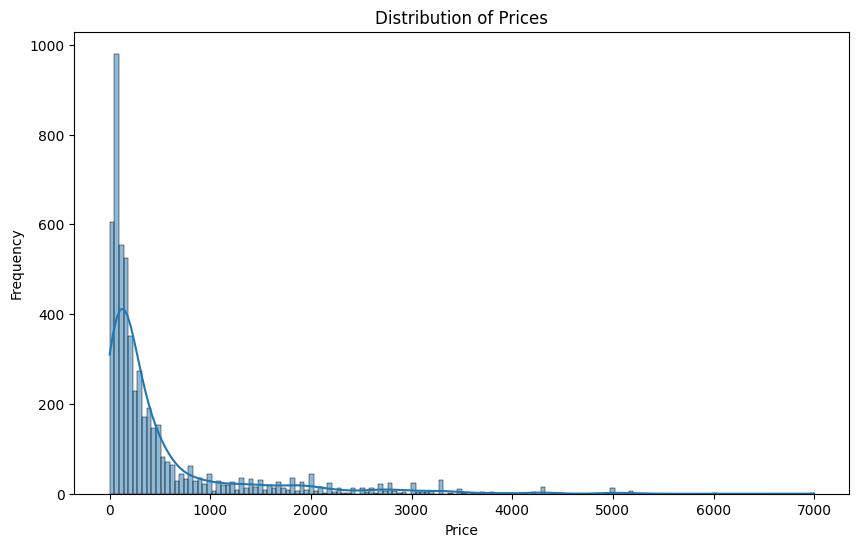

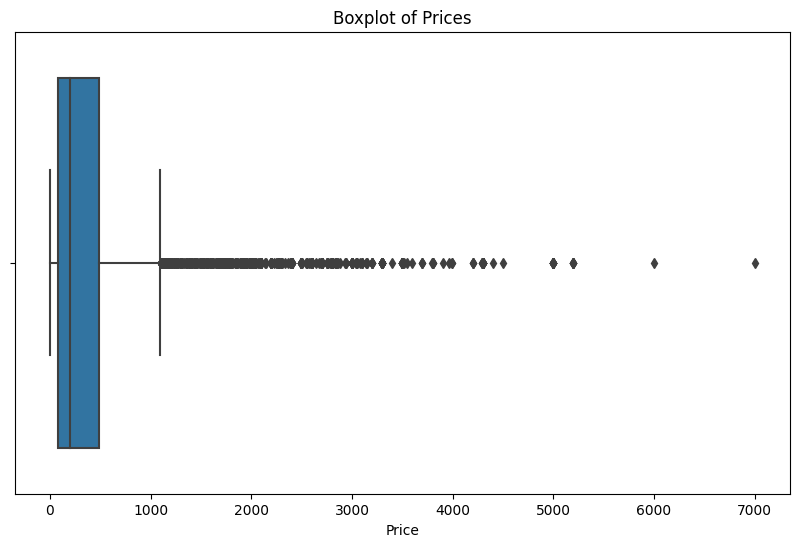

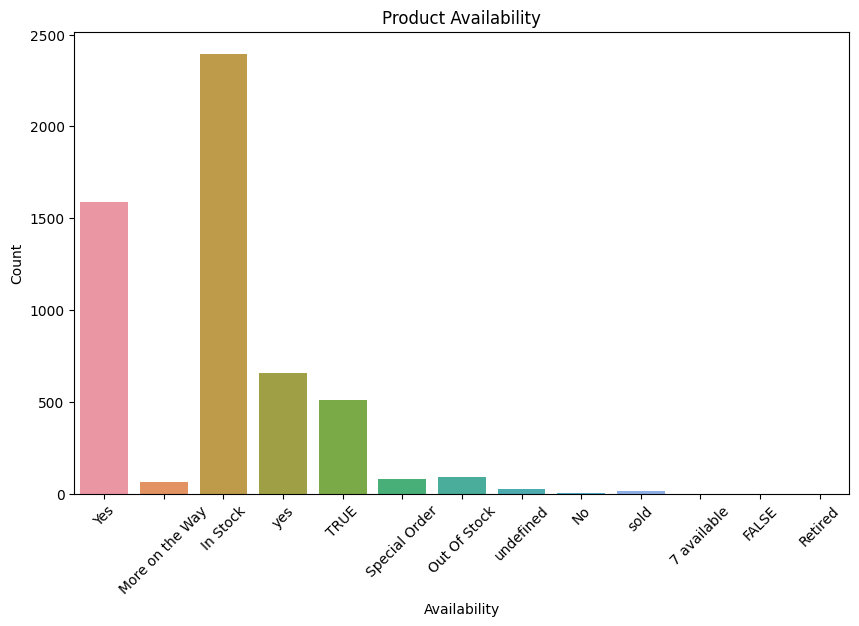

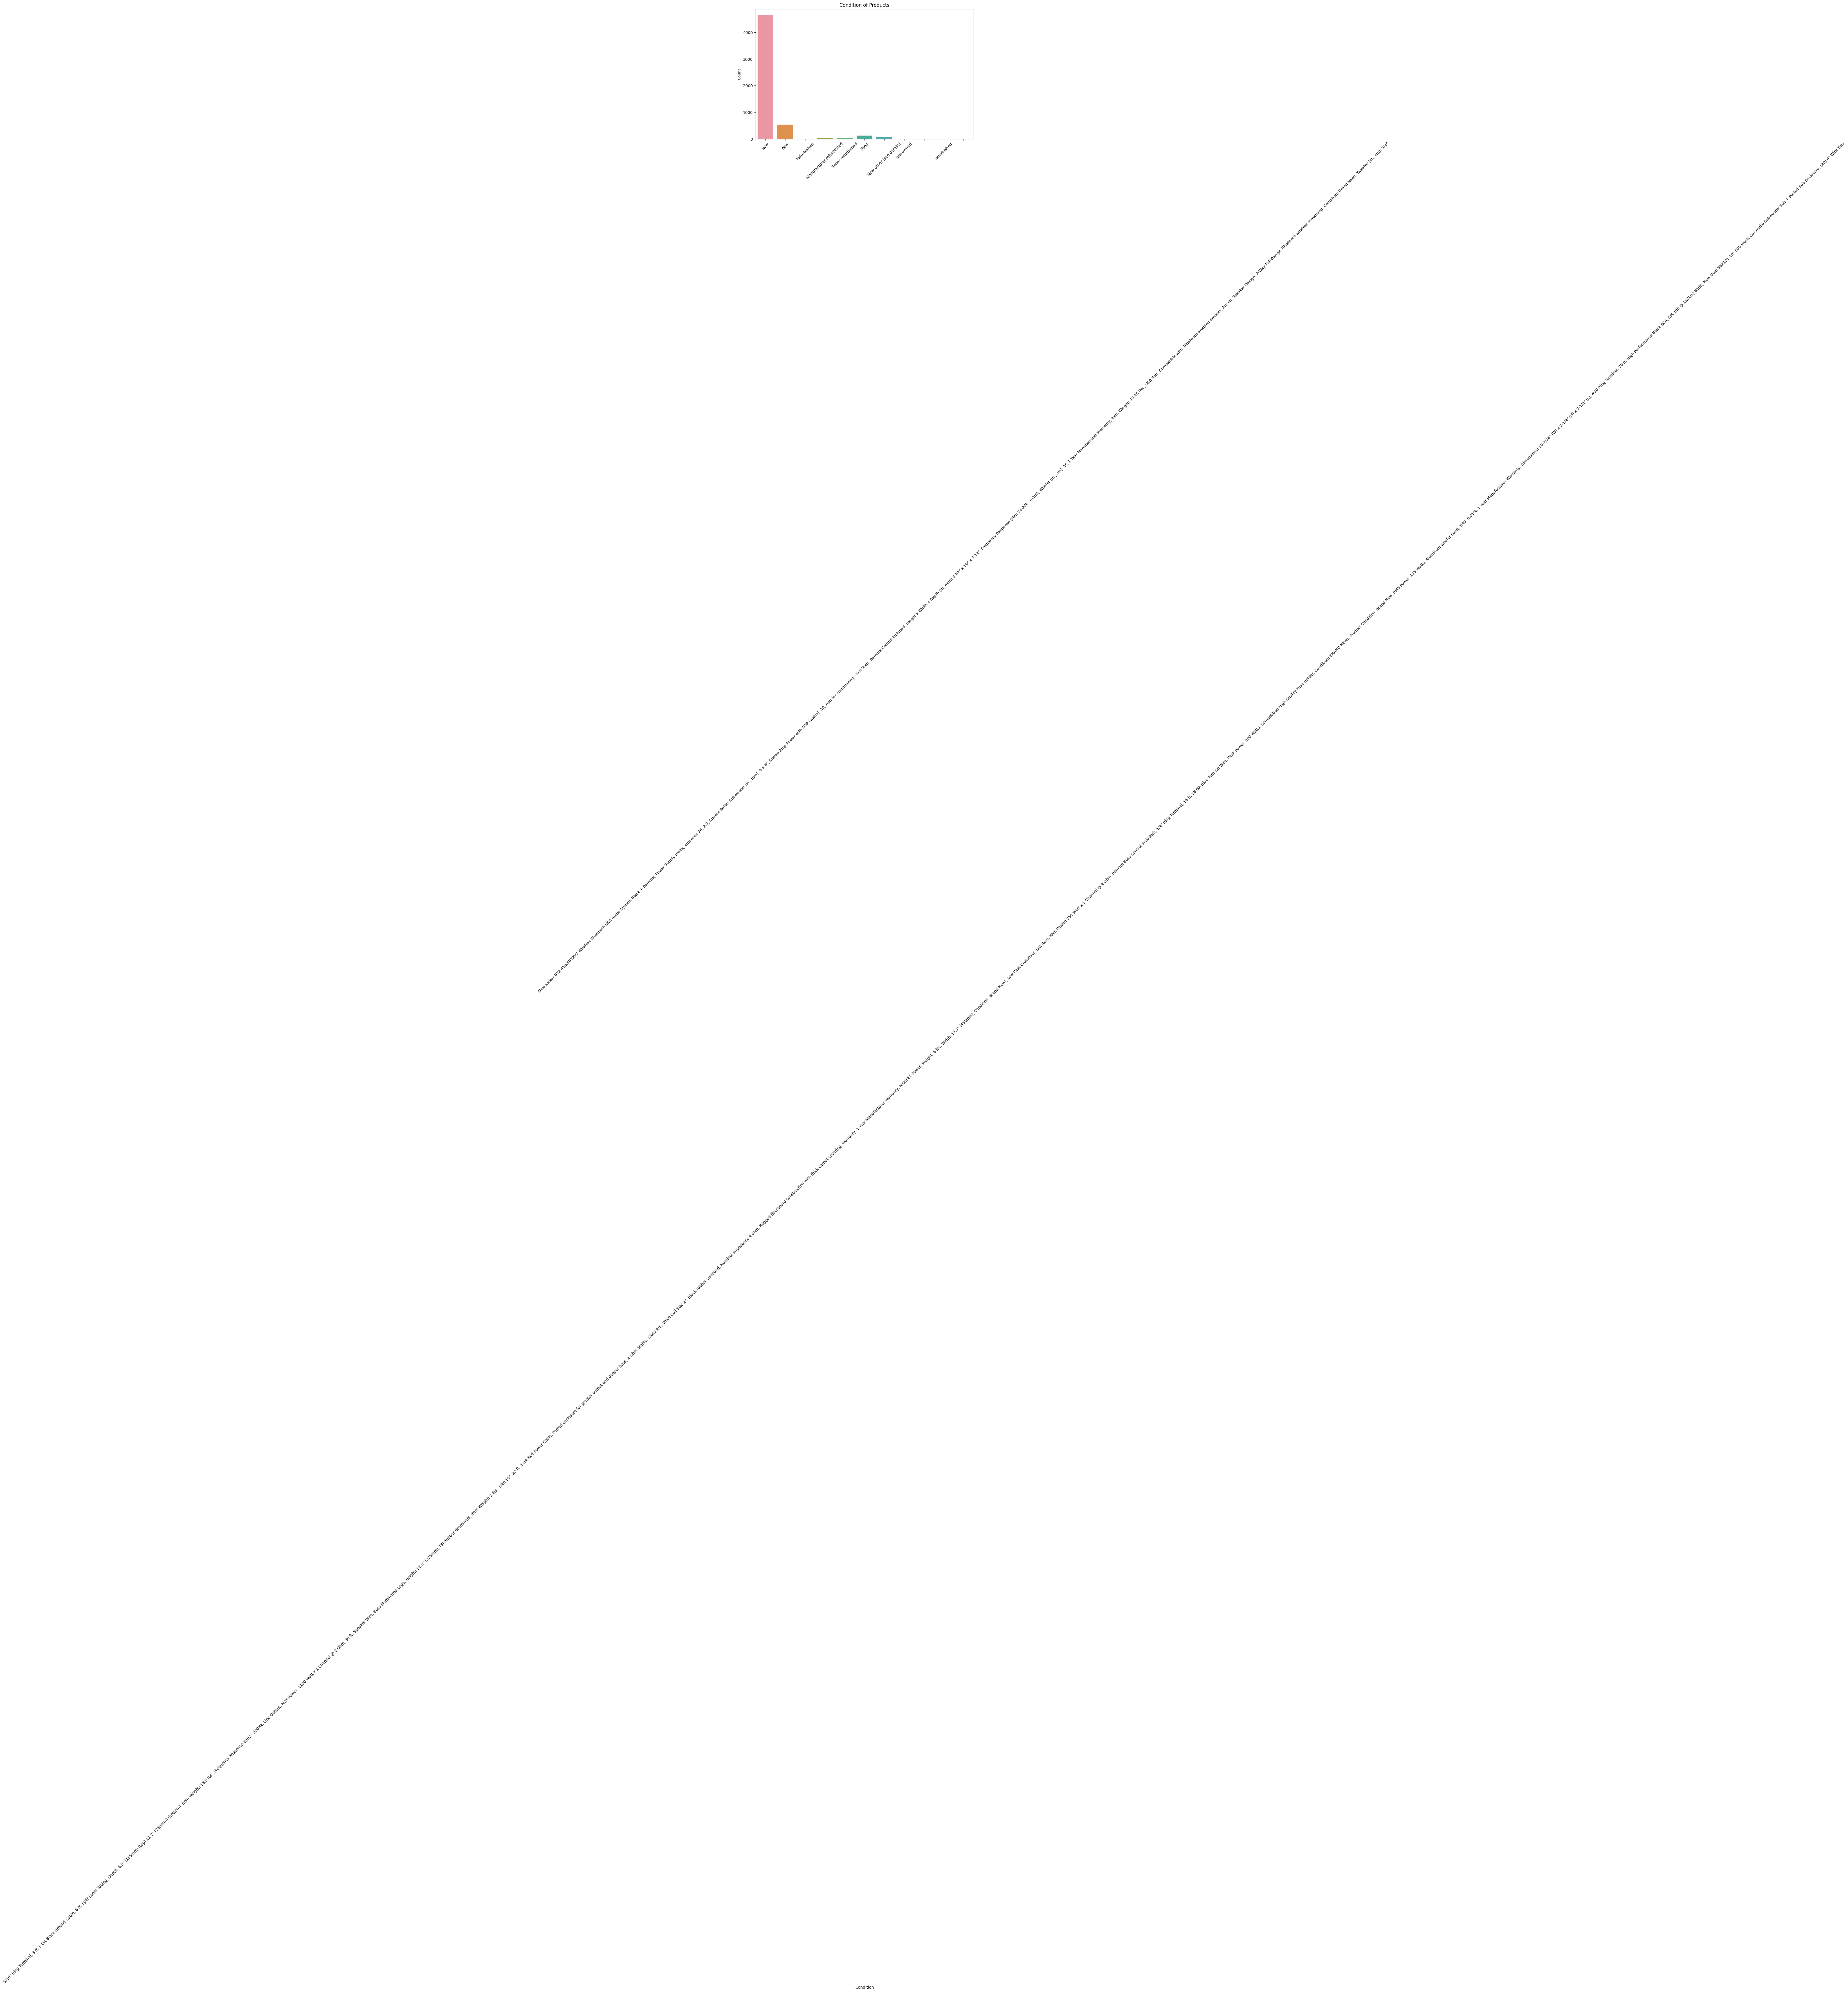

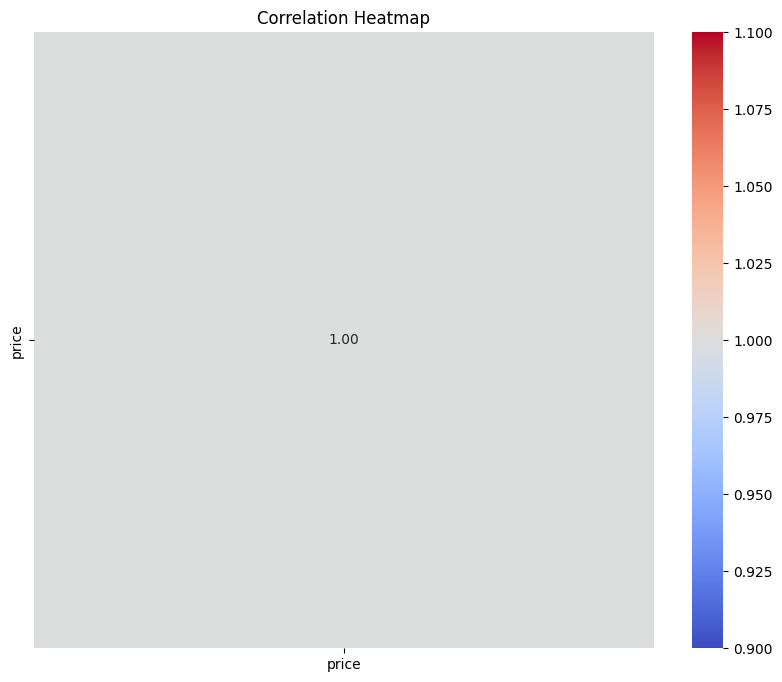

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# data = pd.read_csv('path_to_your_file.csv')

# Filtering numerical columns for correlation
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Histogram of the price column
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of the price column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

# Count plot for the availability status
plt.figure(figsize=(10, 6))
sns.countplot(x='prices.availability', data=data)
plt.title('Product Availability')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count plot for the condition status
plt.figure(figsize=(10, 6))
sns.countplot(x='prices.condition', data=data)
plt.title('Condition of Products')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Handling missing values (Example: Dropping rows where 'manufacturer' is missing)
data = data.dropna(subset=['manufacturer'])

# Feature Engineering (Example: Creating a new feature)
data['price_log'] = np.log(data['price'] + 1)

/tmp/ipykernel_123/134117386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_log'] = np.log(data['price'] + 1)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Selecting features and target
X = data.drop(['price'], axis=1)  # Drop the target column and any other non-relevant columns
y = data['price']

# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [col for col in X.columns if X[col].dtype in ['int64', 'float64']]),
        ('cat', categorical_transformer, [col for col in X.columns if X[col].dtype == 'object'])
    ])

# Create the preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', XGBRegressor(objective ='reg:squarederror'))])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)


Test RMSE: 38.91250560975026


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("RMSE: {:.2f}".format(rmse))
    print("MAE: {:.2f}".format(mae))
    print("R²: {:.2f}".format(r2))

# Evaluate the model
evaluate_model(model, X_test, y_test)


RMSE: 38.91
MAE: 6.19
R²: 1.00


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
    "XGBoost": XGBRegressor(objective ='reg:squarederror')
}

# Function to evaluate each model
def compare_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        pipeline = make_pipeline(preprocessor, model)
        pipeline.fit(X_train, y_train)
        print(f"Results for {name}:")
        evaluate_model(pipeline, X_test, y_test)
        print("\n")

# Compare models
compare_models(models, X_train, X_test, y_train, y_test)


Results for Linear Regression:
RMSE: 112.89
MAE: 56.01
R²: 0.97


Results for Random Forest:
RMSE: 48.98
MAE: 4.94
R²: 0.99


Results for XGBoost:
RMSE: 38.91
MAE: 6.19
R²: 1.00




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


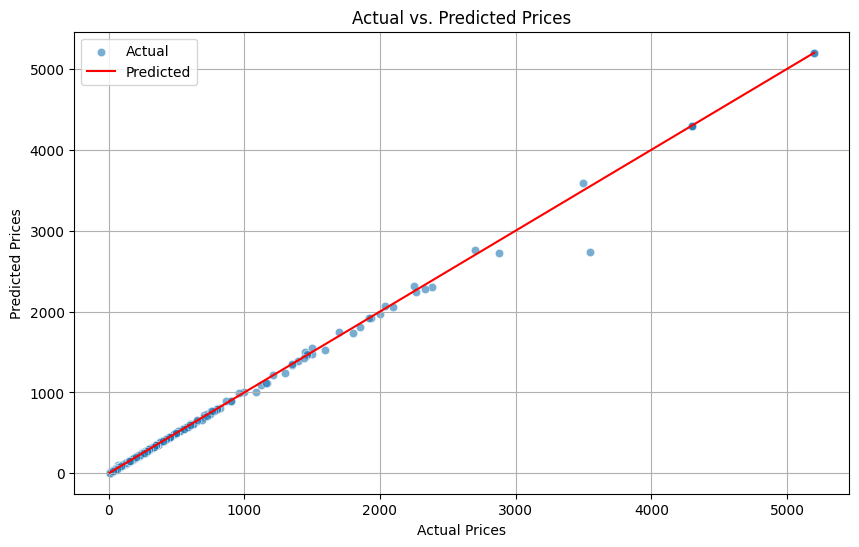

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


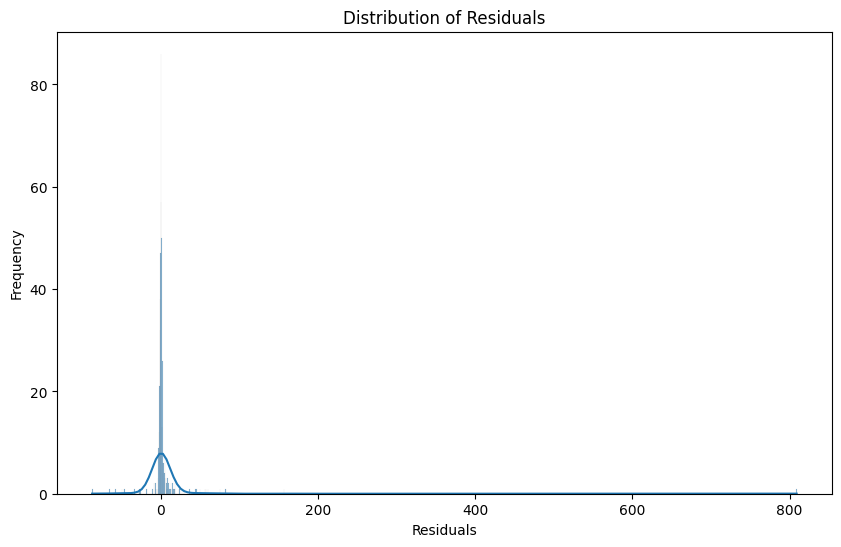

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the prices on the test dataset
y_pred = model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')  # Line for perfect predictions

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.show()

# Optionally, you can plot a histogram of the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
